# Inaugural Project

Imports and set magics:

In [54]:
import numpy as np
import matplotlib.pyplot as plt  

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

### **Method:**

The model is solved using the HouseholdSpecializationModelClass in the following way:

- Create an instance of the class with baseline parameters.
- Use the method, ```calc_utility()```, to calculate all the possible utilities.
- Use the method, ```solve_discrete()```, to maximize utility by findind the optimal level of $H_M, H_F, L_M, L_F$.
- Do this for different values of $\alpha$ and $\sigma$.

#### **Create instance of the model class:**

In [86]:
model = HouseholdSpecializationModelClass()

#### **Setup:**

In [87]:
# create lists of parameters
sigmas = [0.5, 1.0, 1.5]
alphas = [0.25, 0.5, 0.75]

#### **Run model for different values of $\sigma$:**

/Users/andreas/projects-2023-andreas/inauguralproject/HouseholdSpecializationModel.py:91: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


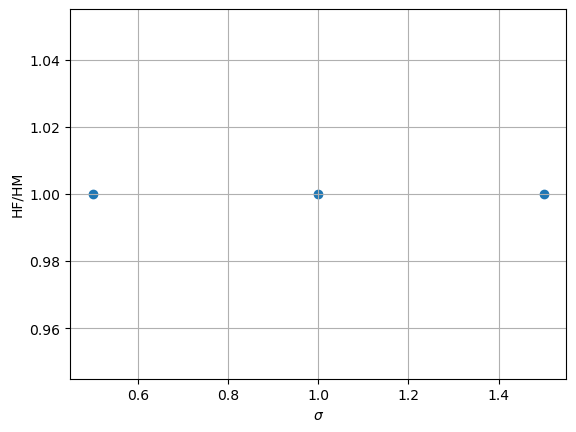

In [91]:
# reset to baseline parameters
model.__init__()

# solve the model for different sigmas
model.solve_multi_par('sigma',sigmas,discrete=True)

# plot the solutions for different sigmas
model.plot_multi_par(sigmas,x_lab=r'$\sigma$',y_lab=r'HF/HM')

#### **Run model for different values of $\alpha$:**

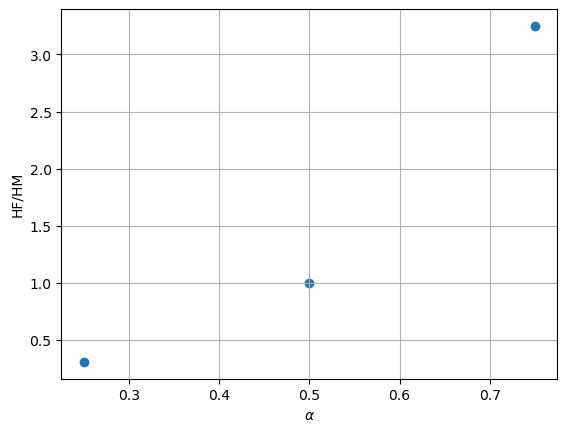

In [92]:
# reset to baseline parameters
model.__init__()

# solve the model for different alphas
model.solve_multi_par('alpha',alphas,discrete=True)

# plot the solutions for different alphas
model.plot_multi_par(alphas,x_lab=r'$\alpha$',y_lab=r'HF/HM')

#### **Economic intepretation:**

#### It is evident that the house work ratio, $H_F/H_M$, does not change with the elasticity of substitution, $\sigma$. Each sex works the same amount, though a high elasticity of substitution, $\sigma$, allows them to change their relative workload and keep the same house production. This is because there is no incentive to do so. I.e. each sex is equally productive as $\alpha = 0.5$, and their wages, $w_F$ and $w_M$, are equivalent. However, if we change $\alpha = 0.25$, the house work ratio decreases as the elasticity of subsitution increases:

/Users/andreas/projects-2023-andreas/inauguralproject/HouseholdSpecializationModel.py:91: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


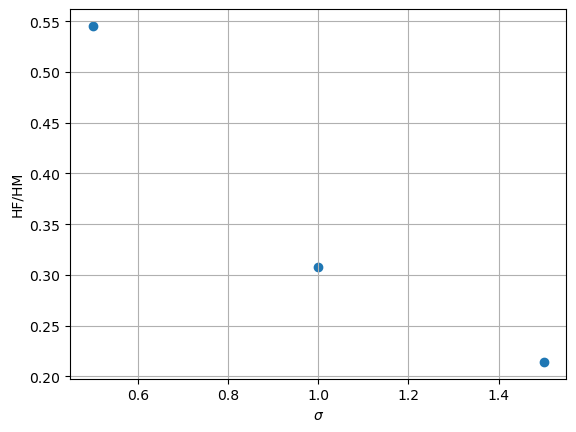

In [93]:
# reset to baseline parameters
model.__init__()

# set alpha to 0.25
setattr(model.par,'alpha',0.25)

# solve the model for different alphas
model.solve_multi_par('sigma',sigmas,discrete=True)

# plot the solutions for different alphas
model.plot_multi_par(sigmas,x_lab=r'$\sigma$',y_lab=r'HF/HM')

# Question 2

#### **Setup:**

In [96]:
# list of wages
wages = [0.8,0.9,1.0,1.1,1.2]

# list of x values for plot
log_wages = [np.log(x/model.par.wM) for x in wages]

#### **Run model for different values of $w_F$:**

/Users/andreas/projects-2023-andreas/inauguralproject/HouseholdSpecializationModel.py:91: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


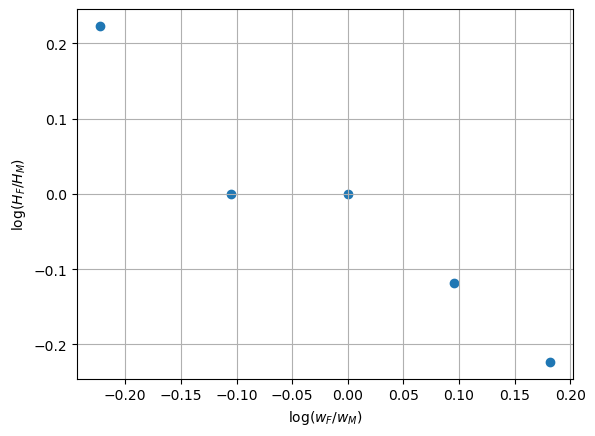

In [97]:
# reset to baseline parameters
model.__init__()

# solve the model for different wages
model.solve_multi_par('wF',wages,discrete=True)

# plot the solutions for different wages
model.plot_multi_par(log_wages,y_function=lambda y: np.log(y),x_lab=r'$\log(w_F/w_M)$',y_lab=r'$\log(H_F/H_M)$')

#### **Economic intepretation:**

#### The plot above indicates a negative correlation between the house work ratio, $H_F/H_M$, and the wage ratio, $w_F/w_M$. In other words, when the female wage increases, she tends to do less house work relative to her husband. The elasticity of substitution, $\sigma=1$ in the Cobb-Douglas case, keeps them from completely reallocating such that the female worker does all the market work, while the male worker does all the house work. If $\sigma$ was higher, it would be easier for the couple to reallocate their time. The plot below illustrates this; as $\sigma = 2.0$ it makes the house work ratio, $H_F/H_M$, decrease even more as $w_F$ increases.

/Users/andreas/projects-2023-andreas/inauguralproject/HouseholdSpecializationModel.py:91: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


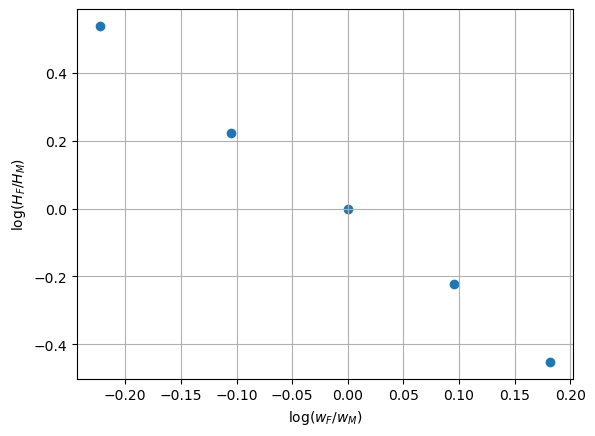

In [103]:
# reset to baseline parameters
model.__init__()

# set sigma to 2.0
setattr(model.par,'sigma',2.0)

# solve the model for different wages
model.solve_multi_par('wF',wages,discrete=True)

# plot the solutions for different wages
model.plot_multi_par(log_wages,y_function=lambda y: np.log(y),x_lab=r'$\log(w_F/w_M)$',y_lab=r'$\log(H_F/H_M)$')

# Question 3

#### **Now, we run the model for different wages, $w_F$, but with a continuous choice set by using a numerical optimizer:**

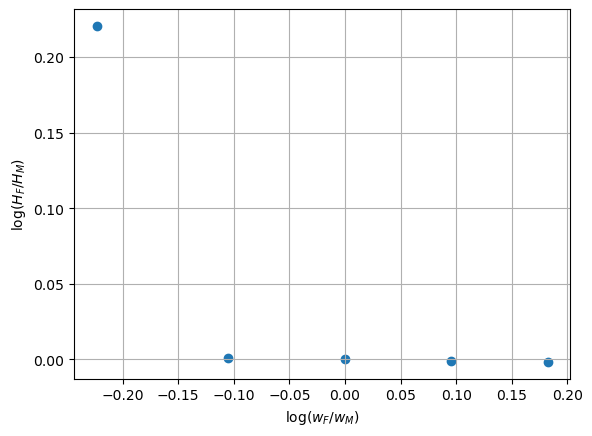

In [101]:
# reset to baseline parameters
model.__init__()

# solve the model for different wages
model.solve_multi_par('wF',wages,discrete=False)

# plot the solutions for different wages
model.plot_multi_par(log_wages,y_function=lambda y: np.log(y),x_lab=r'$\log(w_F/w_M)$',y_lab=r'$\log(H_F/H_M)$')

ADD CONCISE CONLUSION.